In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("insurance.csv")

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.drop(['sex' , 'region' , 'smoker'] , axis=1,inplace=True)

In [34]:
x = df.drop("charges" , axis=1)
y = df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20 , random_state= 30)

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_classification = DecisionTreeRegressor()

In [37]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
regressor=DecisionTreeRegressor()

In [40]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [41]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [42]:
# Assuming 'grid_search' is your fitted GridSearchCV object
best_model = grid.best_estimator_


In [43]:
y_pred = best_model.predict(x_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.06758325528706133
9169.98720173625
143828111.19186458


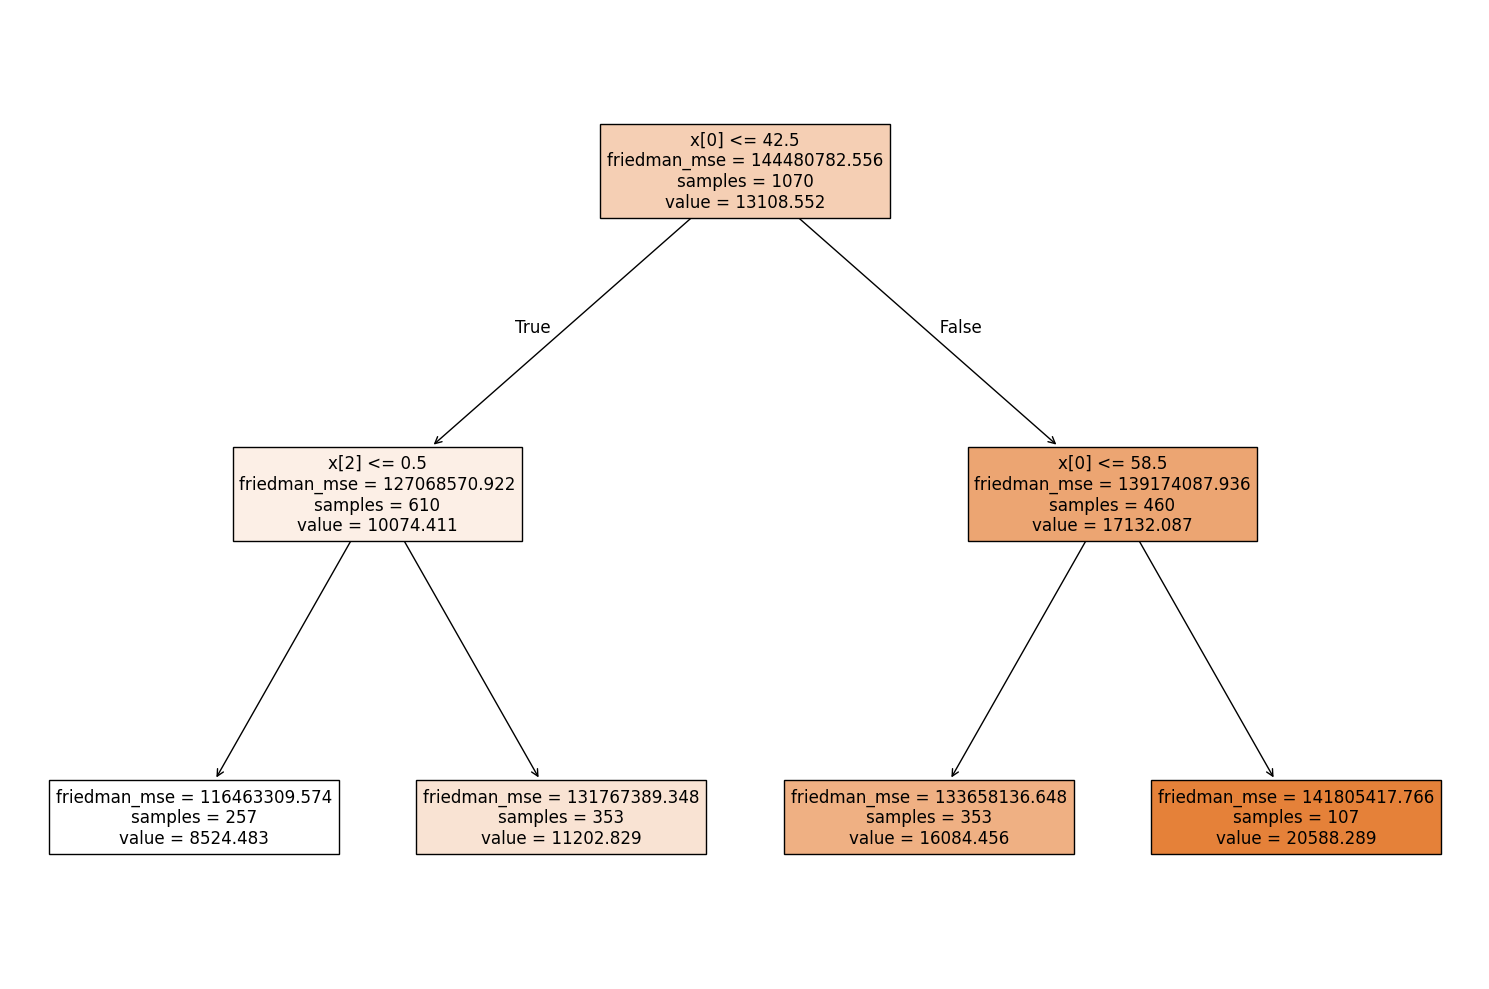

In [46]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model,filled=True)
plt.tight_layout()